<H2>               The Black-Scholes formulas for European Call or Put Option</H2>
<img src = "black_scholes.jpg"/>

In [1]:
# Function to calculate d1 and d2
import numpy as np
def d1d2(S, K, r, sigma, T):
    '''
    takes 
    variable stock price = S
    strike price = K
    continuously compounded risk-free rate = r
    Stock Volatility = sigma
    Time to maturity of the option = T
    '''
    d1= (np.log(S/K)+(r +(sigma**2)/2)*T)/(sigma*np.sqrt(T))
    d2 = d1-(sigma*np.sqrt(T))
    return (d1, d2)

In [2]:
# Function for call option
from scipy.stats import norm
def call_option(S, K, r, sigma, T):
    d1, d2 = d1d2(S, K, r, sigma, T)
    c = round(S*(norm.cdf(d1)) - K*(np.exp(-r*T))*norm.cdf(d2), 2)
    return c

In [3]:
# Function for Put option
def put_option(S, K, r, sigma, T):
    d1, d2 = d1d2(S, K, r, sigma, T)
    p = round(K*(np.exp(-r*T))*norm.cdf(-d2)-S*(norm.cdf(-d1)), 2)
    return p

In [4]:
S = float(input("Stock Price: "))
K = float(input("Strike Price: "))
r = float(input("Risk free rate: "))
sigma = float(input("Volatility: "))
T = float(input("Maturity Time: "))
option = input("Type of Option(P for Put, C for call Option and B for both): ")

print("*******************************************************")
if option == "C":
    premium = call_option(S, K, r, sigma, T)
    print("The Premium for call option is: " + str(premium))
    print("*******************************************************")
elif option == "P":
    premium = put_option(S, K, r, sigma, T)
    print("The Premium for Put option is: " + str(premium))
    print("*******************************************************")
elif option == "B":
    premium_call = call_option(S, K, r, sigma, T)
    premium_put = put_option(S, K, r, sigma, T)
    print("The Option value for Call option is: " + str(premium_call))
    print("The Option value for Put option is: " + str(premium_put))
    print("*******************************************************")
else:
    print("!!!Invalid char to choose option type C for call and P for Put")
    print("*******************************************************")
    

Stock Price: 300
Strike Price: 350
Risk free rate: 0.12
Volatility: 0.2
Maturity Time: 1
Type of Option(P for Put, C for call Option and B for both): P
*******************************************************
The Premium for Put option is: 29.88
*******************************************************


<H2>Geometric Brownian Motion</H2>
<img src ="brown.jpg"/>

In [5]:
import matplotlib.pyplot as plt

In [6]:
# Function to make simulation of brownian motion using the formula
def simulation(S0, r, sigma, T, n, m):
    '''
    Input variables:
    S0--assest prize at time 0
    r-- expected rate of return
    sigma--volatility
    n-- number of steps
    m-- number of simulations
    Output variables:
    St--assest prize at time t
    tt-- time intveral'''
    
    dt = T/n
    St = np.exp((r-(sigma**2)/2)*dt + sigma * np.random.normal(0, np.sqrt(dt), size=(m,n)).T)
    St = np.vstack([np.ones(m), St])
    St = S0*St.cumprod(axis=0) 
    
    time = np.linspace(0, T, n+1)
    tt = np.full(shape = (m, n+1), fill_value=time).T
    return St, tt

In [7]:
# Plotting the graph for brownian motion
def plot(S0, r, sigma, T, n, m):
    St, tt = simulation(S0, r, sigma, T, n, m)
    a = np.average(St, axis=0)
    print("*******************************************************")
    print("Prediction based on simulation: "+str(np.average(a)))
    print("*******************************************************")
    plt.plot(tt, St)
    plt.xlabel("Years $(t)$")
    plt.ylabel("Stock Price $(S_t)$")
    plt.title("Geometric Brownian Motion \n $dS_t = r S_t dt + \sigma S_td W_t$ \n $S_0 = {0}, r = {1}, \sigma = {2}$".format(S0, r, sigma))
    plt.show()

Stock Price: 300
Risk free rate: 0.1
Volatility: 0.2
Time in Years: 1
Number of steps: 100
Number of simulations: 1000
*******************************************************
Prediction based on simulation: 314.22716624232567
*******************************************************


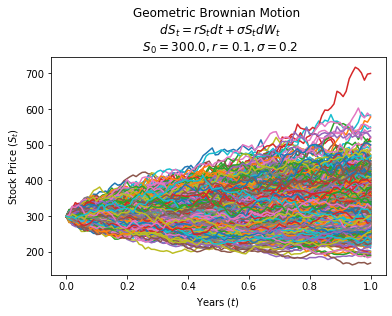

In [9]:
S0 = float(input("Stock Price: "))
r = float(input("Risk free rate: "))
sigma = float(input("Volatility: "))
T = float(input("Time in Years: "))
n = int(input("Number of steps: "))
m = int(input("Number of simulations: "))
plot(S0, r, sigma, T, n, m)

<H2>Binomial Model European Put Option</H2>
<img src="binomial.jpg"/>
<img src ="binomial1.jpg"/>

In [10]:
# Function to calculate parameters
def params(T, N, r, sigma):
    """Input parameter:
        T = time period in years
        N= number of intervals
        r = risk free rate of return
        sigma = volatility
    Output:
        p = Probability
        u = up factor
        d = down factor
        dt = length of time interval at n
    """
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (np.exp(r*dt) - d)/(u-d)
    return (p, u, d, dt)
    

In [11]:
# function for european put
def european_put(S0, K, T, N, r, sigma):
    """Input Parameters:
        S0 = Stock Price
        K= Strike Price"""
    p, u, d, dt = params(T, N, r, sigma)
    option_price = np.zeros((N+1, N+1))
    
    # For last tree
    for j in range(N):
        option_price[N][j] = max(K - S0*(u**j)*(d**(N-j)), 0) 
            
    for i in reversed(range(N)):
        for j in range(i+1):
            option_price[i][j] = (np.exp(-r*dt))*(p*option_price[i+1][j+1] + (1-p)*option_price[i+1][j])
            
    return option_price


<H2>Binomial Model European Call Option</H2>
<img src="binomial.jpg"/>
<img src ="binomial2.jpg"/>

In [12]:
# function for european call option
def european_call(S0, K, T, N, r, sigma):
    """Input Parameters:
        S0 = Stock Price
        K= Strike Price"""
    p, u, d, dt = params(T, N, r, sigma)
    option_price = np.zeros((N+1, N+1))
    
    # For last tree
    for j in range(N):
        option_price[N][j] = max(S0*(u**j)*(d**(N-j)) -K, 0) 
            
    for i in reversed(range(N)):
        for j in range(i+1):
            option_price[i][j] = (np.exp(-r*dt))*(p*option_price[i+1][j+1] + (1-p)*option_price[i+1][j])
            
    return option_price

<H2>Binomial Model American Put Option</H2>
<img src="binomial.jpg"/>
<img src ="binomial3.jpg"/>

In [13]:
# function for european call option
def american_put(S0, K, T, N, r, sigma):
    """Input Parameters:
        S0 = Stock Price
        K= Strike Price"""
    p, u, d, dt = params(T, N, r, sigma)
    option_price = np.zeros((N+1, N+1))
    
    # For last tree
    for j in range(N):
        option_price[N][j] = max(K - S0*(u**j)*(d**(N-j)), 0) 
            
    for i in reversed(range(N)):
        for j in range(i+1):
            option_price[i][j] = max((K - S0*(u**j)*(d**(i-j))),(np.exp(-r*dt))*(p*option_price[i+1][j+1] + (1-p)*option_price[i+1][j]))
            
    return option_price

<H2>Binomial Model American Put Option</H2>
<img src="binomial.jpg"/>
<img src ="binomial4.jpg"/>

In [14]:
# function for european call option
def american_put(S0, K, T, N, r, sigma):
    """Input Parameters:
        S0 = Stock Price
        K= Strike Price"""
    p, u, d, dt = params(T, N, r, sigma)
    option_price = np.zeros((N+1, N+1))
    
    # For last tree
    for j in range(N):
        option_price[N][j] = max(S0*(u**j)*(d**(N-j)) - K, 0) 
            
    for i in reversed(range(N)):
        for j in range(i+1):
            option_price[i][j] = max((S0*(u**j)*(d**(i-j)) - K),(np.exp(-r*dt))*(p*option_price[i+1][j+1] + (1-p)*option_price[i+1][j]))
            
    return option_price

In [15]:
S0 = float(input("Stock Price: "))
K = float(input("Strike Price: "))
r = float(input("Risk free rate: "))
sigma = float(input("Volatility: "))
T = float(input("Maturity Time: "))
N = int(input("Number of Intervals: "))
eu_am = input("Type (E for European Option and A for American Option): ")
put_call = input("Type (P for Put Option and C for Call Option): ")

print("**************************************************************")
if eu_am == "E" and put_call == "P":
    option = european_put(S0, K, T, N, r, sigma)
    print("Option value for European Put Option: " +str(round(option[0][0],3)))
    
elif eu_am == "E" and put_call == "C":
    option = european_call(S0, K, T, N, r, sigma)
    print("Option Value for European Call Option: " +str(round(option[0][0],3)))
    
elif eu_am == "A" and put_call == "P":
    option = american_put(S0, K, T, N, r, sigma)
    print("Option Value for Americal Put Option: " +str(round(option[0][0],3)))

elif eu_am == "A" and put_call == "C":
    option = american_call(S0, K, T, N, r, sigma)
    print("Option Value for American Call Option: " +str(round(option[0][0],3)))
else:
    print("!!! Please input correct character to call model ")

Stock Price: 300
Strike Price: 350
Risk free rate: 0.12
Volatility: 0.2
Maturity Time: 1
Number of Intervals: 5
Type (E for European Option and A for American Option): E
Type (P for Put Option and C for Call Option): P
**************************************************************
Option value for European Put Option: 29.86
